<a href="https://colab.research.google.com/github/manishmawatwal/DataScience/blob/main/Analysis_of_Meteorological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# upload files on google colab drive
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading data to the variable - weather_data
filepath = 'weatherHistory.csv'
weather_data = pd.read_csv(filepath)

In [34]:
weather_data.head(3)

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.

[3 rows x 10 columns]

In [6]:
weather_data.shape
#(rows,columns)

(96453, 12)

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
#checking unique values in the column 'Loud Cover'
weather_data['Loud Cover'].unique()

array([0.])

In [9]:
#since there are no unique values we will drop it as it doesn't help in prediction
weather_data = weather_data.drop('Loud Cover', axis=1)

In [10]:
#checking for missing values
weather_data.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
#missing values percentage
missing_perc = (weather_data.isnull().sum() / np.product(weather_data.shape)) * 100
missing_perc

Formatted Date              0.000000
Summary                     0.000000
Precip Type                 0.048728
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64

In [12]:
#finding unique values in 'Precip Type' column
weather_data['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [13]:
#replacing the missing values with forward fill method
weather_data = weather_data.fillna(method='ffill')
weather_data.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [14]:
#finding the format of the date column
weather_data['Formatted Date'].head()

0    2006-04-01 00:00:00.000 +0200
1    2006-04-01 01:00:00.000 +0200
2    2006-04-01 02:00:00.000 +0200
3    2006-04-01 03:00:00.000 +0200
4    2006-04-01 04:00:00.000 +0200
Name: Formatted Date, dtype: object

In [15]:
#changing the time format
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], utc=True)
weather_data['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [16]:
#dataframe index set to 'Formatted Date'
weather_data = weather_data.set_index('Formatted Date')
weather_data.head(2)

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.

[2 rows x 10 columns]

In [17]:
#print the unique values in all the columns
weather_data.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [18]:
#setting plot style
sns.set_style(style='whitegrid')

In [19]:
weather_data.describe()

Temperature (C)  ...  Pressure (millibars)
count     96453.000000  ...          96453.000000
mean         11.932678  ...           1003.235956
std           9.551546  ...            116.969906
min         -21.822222  ...              0.000000
25%           4.688889  ...           1011.900000
50%          12.000000  ...           1016.450000
75%          18.838889  ...           1021.090000
max          39.905556  ...           1046.380000

[8 rows x 7 columns]

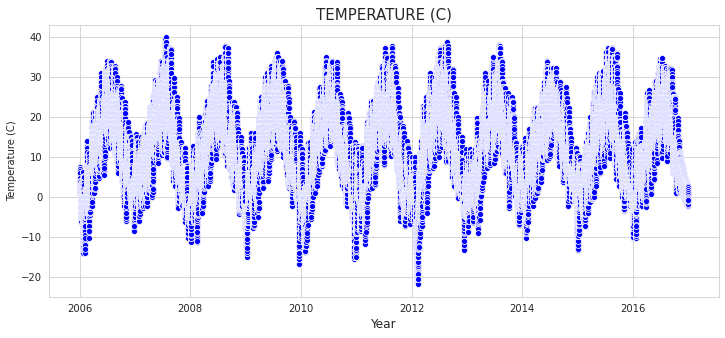

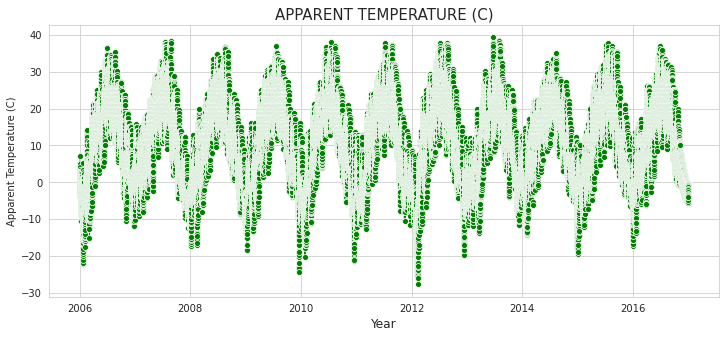

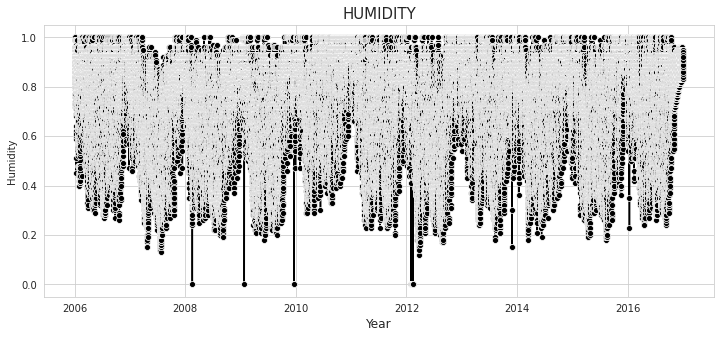

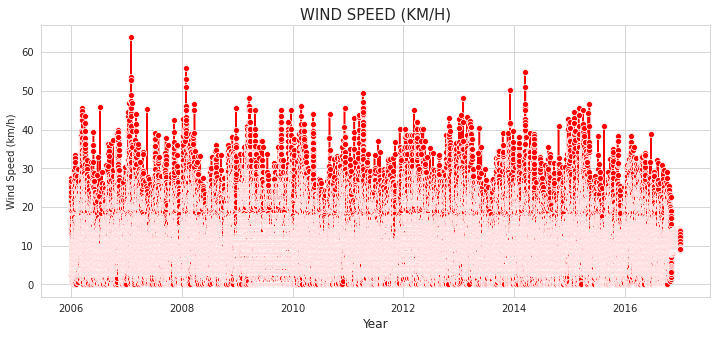

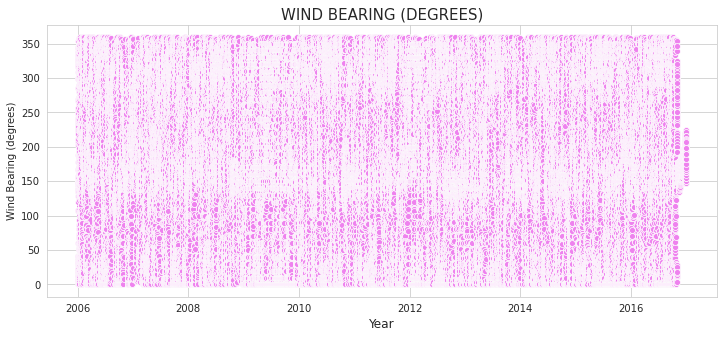

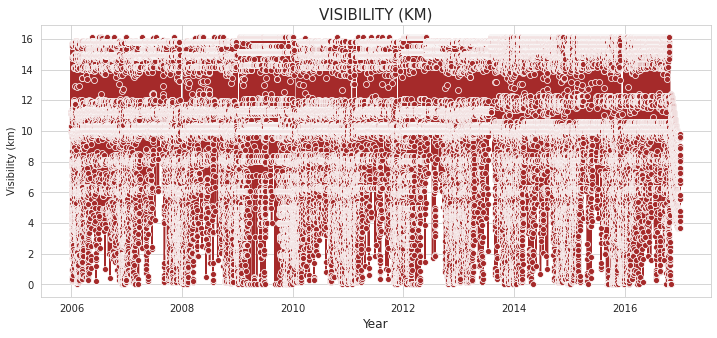

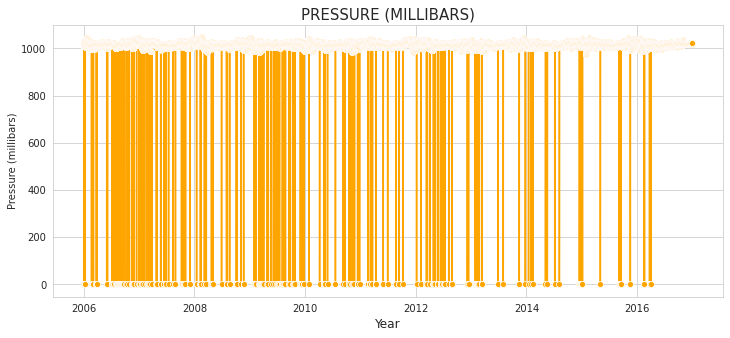

In [20]:
#plotting the weather data
color={2:'blue',
       3:'green',
       4:'black',
       5:'red',
       6:'violet',
       7:'brown',
       8:'orange'}
for index in range(2,9):
    plt.figure(figsize=(12,5))
    plt.xlabel('Year', fontsize=12)
    plt.title('{}'.format(weather_data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=weather_data.iloc[:,index], color=color[index], marker='o')
    plt.show()

In [21]:
weather_data.corr()

Temperature (C)  ...  Pressure (millibars)
Temperature (C)                  1.000000  ...             -0.005447
Apparent Temperature (C)         0.992629  ...             -0.000219
Humidity                        -0.632255  ...              0.005454
Wind Speed (km/h)                0.008957  ...             -0.049263
Wind Bearing (degrees)           0.029988  ...             -0.011651
Visibility (km)                  0.392847  ...              0.059818
Pressure (millibars)            -0.005447  ...              1.000000

[7 rows x 7 columns]

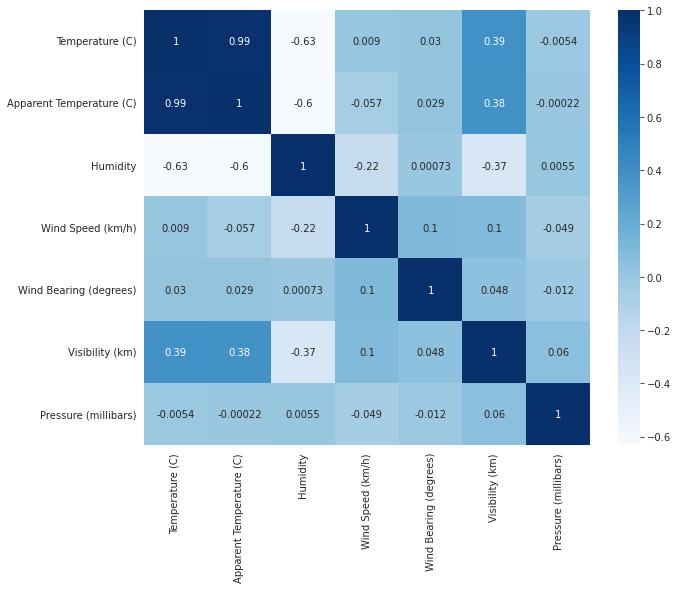

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data=weather_data.corr(), annot=True, cmap='Blues')
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
#create a new dataframe for particular indexes
indices = ['Temperature (C)', 'Humidity', 'Precip Type', 'Summary']
extr_data = weather_data.filter(indices,axis=1)
extr_data.head()

Temperature (C)  Humidity Precip Type        Summary
Formatted Date                                                                 
2006-03-31 22:00:00+00:00         9.472222      0.89        rain  Partly Cloudy
2006-03-31 23:00:00+00:00         9.355556      0.86        rain  Partly Cloudy
2006-04-01 00:00:00+00:00         9.377778      0.89        rain  Mostly Cloudy
2006-04-01 01:00:00+00:00         8.288889      0.83        rain  Partly Cloudy
2006-04-01 02:00:00+00:00         8.755556      0.83        rain  Mostly Cloudy

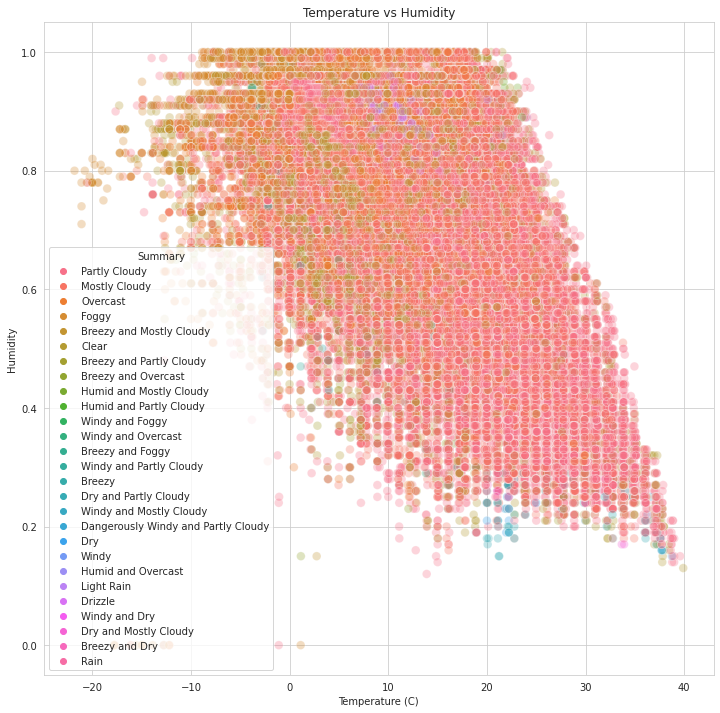

In [40]:
#plotting the temperature and humidity of the new dataframe
plt.figure(figsize=(12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=extr_data.iloc[:,0],
                y=extr_data.iloc[:,1],
                hue=extr_data.iloc[:,3],
                s=75,
                alpha=0.3)
plt.show()

In [44]:
print(extr_data.describe())

       Temperature (C)      Humidity
count     96453.000000  96453.000000
mean         11.932678      0.734899
std           9.551546      0.195473
min         -21.822222      0.000000
25%           4.688889      0.600000
50%          12.000000      0.780000
75%          18.838889      0.890000
max          39.905556      1.000000


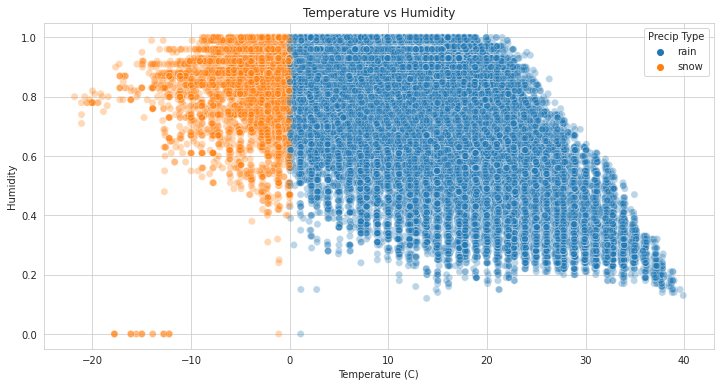

In [45]:
#plot for temperature and humidity by Precip Type
plt.figure(figsize=(12,6))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=extr_data.iloc[:,0],
                y=extr_data.iloc[:,1],
                hue=extr_data.iloc[:,2],
                s=50,
                alpha=0.3)
plt.show()

In [46]:
#function for plotting yearwise data
def year_plot(year):
    data = extr_data[extr_data.index.year == year]
    plt.figure(figsize=(8,4))
    plt.title('Temperature vs Humidity for {}'.format(year))
    sns.scatterplot(x=data.iloc[:,0],
                    y=data.iloc[:,1],
                    hue=data.iloc[:,2],
                    s=50,
                    alpha=0.3)
    plt.show()
    print(data.describe())
    print('-'*70)

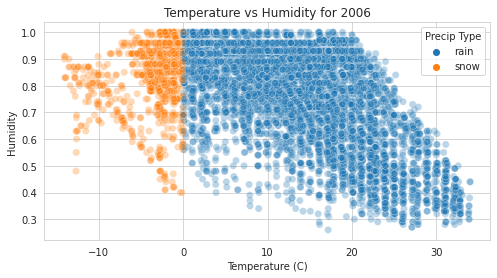

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.215225     0.767349
std           9.597856     0.174838
min         -14.088889     0.260000
25%           2.805556     0.650000
50%          11.711111     0.810000
75%          18.209722     0.920000
max          34.005556     1.000000
----------------------------------------------------------------------


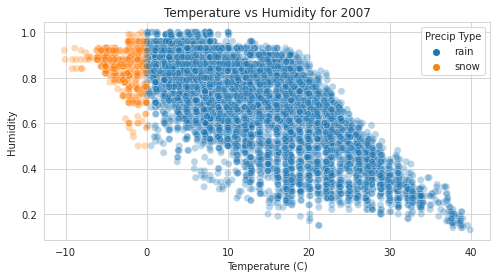

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.134677     0.689647
std           9.384959     0.199642
min         -10.155556     0.130000
25%           5.033333     0.550000
50%          11.138889     0.740000
75%          18.800000     0.850000
max          39.905556     1.000000
----------------------------------------------------------------------


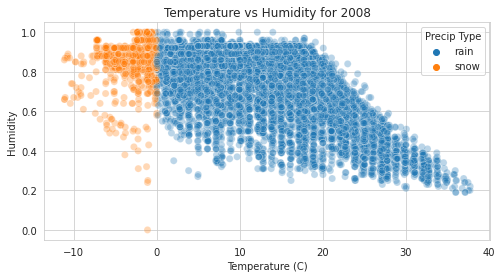

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         12.161819     0.701239
std           9.177221     0.184552
min         -11.127778     0.000000
25%           5.583333     0.570000
50%          11.577778     0.740000
75%          18.656944     0.850000
max          37.755556     1.000000
----------------------------------------------------------------------


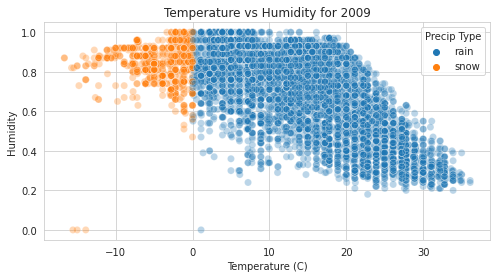

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.269682     0.707247
std           9.769443     0.204392
min         -16.666667     0.000000
25%           5.000000     0.560000
50%          12.508333     0.760000
75%          19.894444     0.880000
max          36.111111     1.000000
----------------------------------------------------------------------


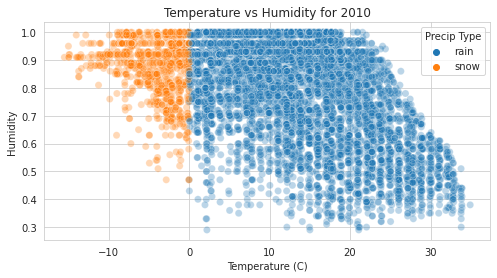

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.200176     0.796861
std           9.651203     0.168371
min         -15.483333     0.290000
25%           3.750000     0.690000
50%          11.975000     0.850000
75%          17.800000     0.930000
max          34.927778     1.000000
----------------------------------------------------------------------


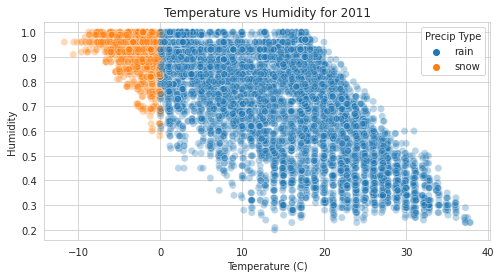

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.524934     0.736008
std          10.138539     0.202678
min         -11.700000     0.200000
25%           2.665278     0.590000
50%          11.688889     0.790000
75%          18.945833     0.910000
max          37.800000     1.000000
----------------------------------------------------------------------


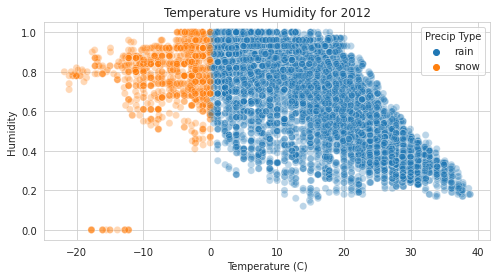

       Temperature (C)     Humidity
count      8784.000000  8784.000000
mean         11.986824     0.689513
std          11.021216     0.218004
min         -21.822222     0.000000
25%           3.793056     0.527500
50%          12.222222     0.730000
75%          20.000000     0.870000
max          38.861111     1.000000
----------------------------------------------------------------------


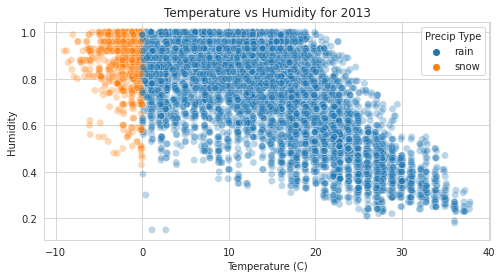

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         11.941017     0.754197
std           9.389492     0.194925
min          -8.983333     0.150000
25%           3.943056     0.630000
50%          11.941667     0.800000
75%          18.750000     0.920000
max          37.872222     1.000000
----------------------------------------------------------------------


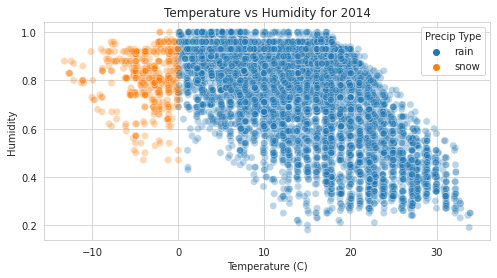

       Temperature (C)     Humidity
count      8757.000000  8757.000000
mean         12.528228     0.748571
std           8.184753     0.183548
min         -13.255556     0.180000
25%           6.600000     0.640000
50%          12.355556     0.800000
75%          18.344444     0.900000
max          33.911111     1.000000
----------------------------------------------------------------------


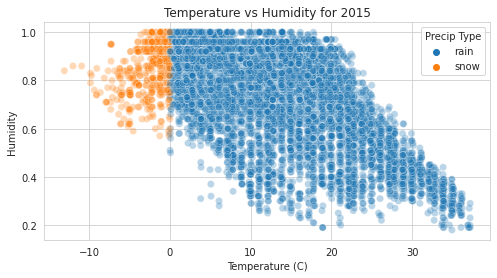

       Temperature (C)     Humidity
count      8760.000000  8760.000000
mean         12.312088     0.732354
std           9.366111     0.200232
min         -13.066667     0.180000
25%           4.433333     0.590000
50%          12.055556     0.780000
75%          18.911111     0.900000
max          37.194444     1.000000
----------------------------------------------------------------------


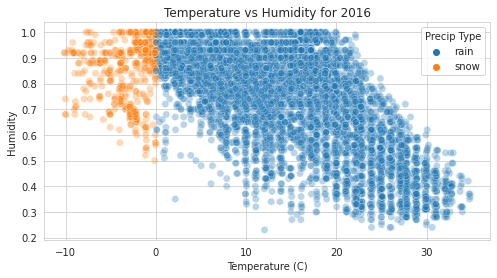

       Temperature (C)     Humidity
count      8783.000000  8783.000000
mean         11.987381     0.760868
std           9.029420     0.182269
min         -10.133333     0.230000
25%           4.788889     0.650000
50%          11.088889     0.810000
75%          18.800000     0.900000
max          34.811111     1.000000
----------------------------------------------------------------------


In [47]:
for year in range(2006,2017):
    year_plot(year)

YEAR-WISE ANALYSIS

In [50]:
#resampling the data year-wise by mean
indices = [2,4,6,7,8]
year_data = weather_data.iloc[:,indices].resample('Y').mean()
year_data.head(4)

Temperature (C)  ...  Pressure (millibars)
Formatted Date                              ...                      
2005-12-31 00:00:00+00:00         0.577778  ...           1016.660000
2006-12-31 00:00:00+00:00        11.215225  ...            992.545486
2007-12-31 00:00:00+00:00        12.134677  ...           1001.639412
2008-12-31 00:00:00+00:00        12.161819  ...           1007.734488

[4 rows x 5 columns]

In [51]:
year_data.describe()

Temperature (C)   Humidity  ...  Visibility (km)  Pressure (millibars)
count        12.000000  12.000000  ...        12.000000             12.000000
mean         10.986652   0.747821  ...        10.317006           1004.350936
std           3.304587   0.055752  ...         0.683570              8.761040
min           0.577778   0.689513  ...         9.140282            987.277688
25%          11.447507   0.705745  ...         9.925820           1001.064910
50%          11.987102   0.742290  ...        10.314776           1004.883368
75%          12.188785   0.762488  ...        10.898033           1009.346742
max          12.528228   0.890000  ...        11.320400           1016.660000

[8 rows x 5 columns]

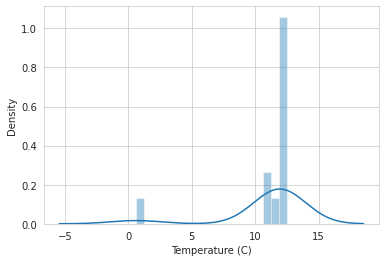

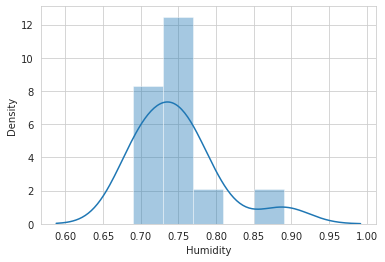

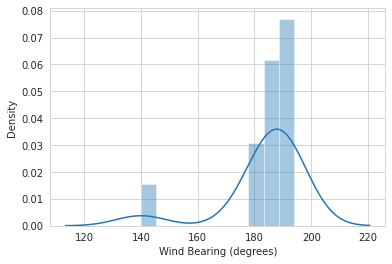

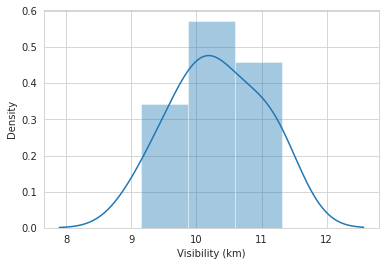

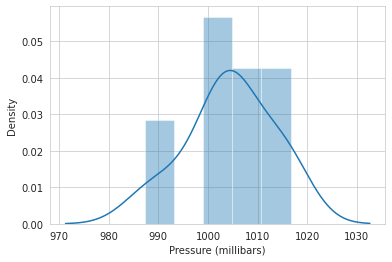

In [52]:
for ind in range(len(year_data.columns)):
    sns.distplot(year_data.iloc[:,ind])
    plt.show()

In [53]:
year_data.corr()

Temperature (C)  ...  Pressure (millibars)
Temperature (C)                1.000000  ...             -0.456851
Humidity                      -0.840537  ...              0.354860
Wind Bearing (degrees)         0.911849  ...             -0.312691
Visibility (km)                0.248731  ...             -0.186035
Pressure (millibars)          -0.456851  ...              1.000000

[5 rows x 5 columns]

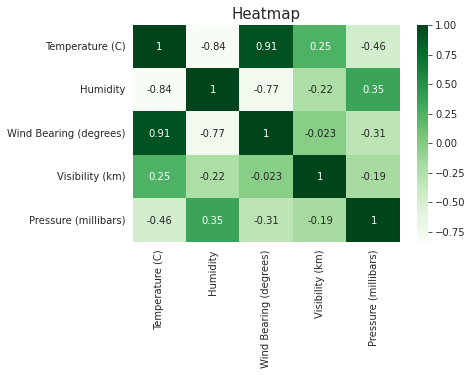

In [56]:
plt.title('Heatmap', fontsize=15)
sns.heatmap(data=year_data.corr(), annot=True, cmap='Greens')
plt.show()

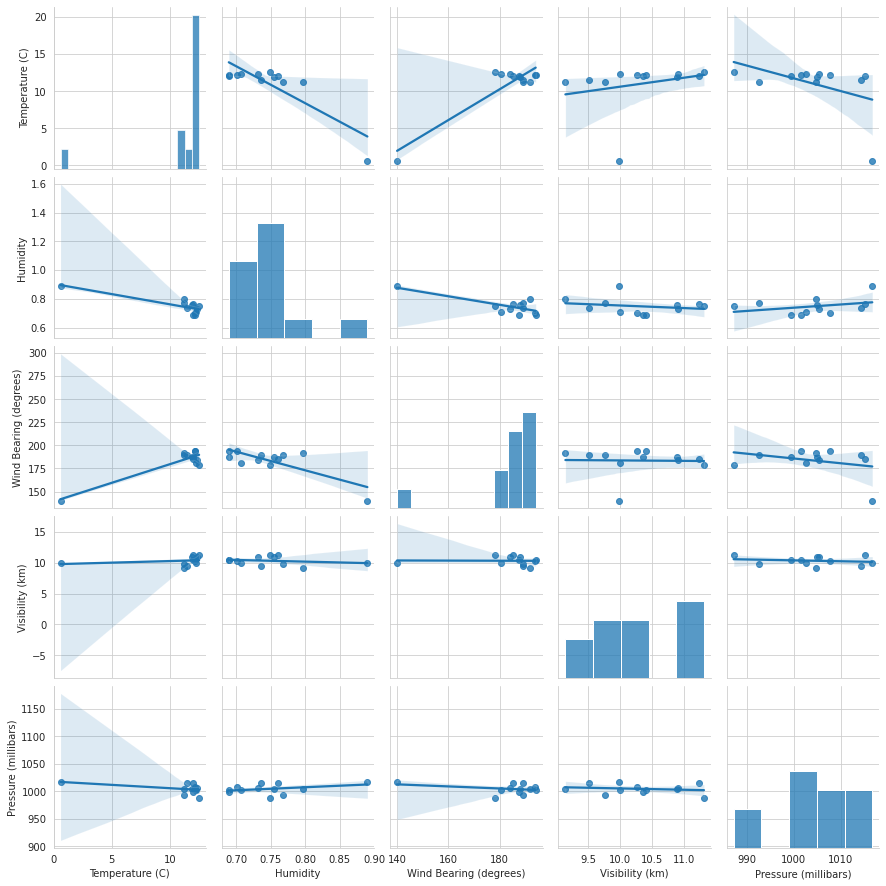

In [57]:
#pair plot for correlation
sns.pairplot(year_data, kind='reg')
plt.show()

In [59]:
#normalizing year data
norm_data = (year_data - year_data.min()) / (year_data.max() - year_data.min())
norm_data.head(5)

Temperature (C)  ...  Pressure (millibars)
Formatted Date                              ...                      
2005-12-31 00:00:00+00:00         0.000000  ...              1.000000
2006-12-31 00:00:00+00:00         0.890129  ...              0.179285
2007-12-31 00:00:00+00:00         0.967068  ...              0.488788
2008-12-31 00:00:00+00:00         0.969339  ...              0.696228
2009-12-31 00:00:00+00:00         0.978365  ...              0.521653

[5 rows x 5 columns]

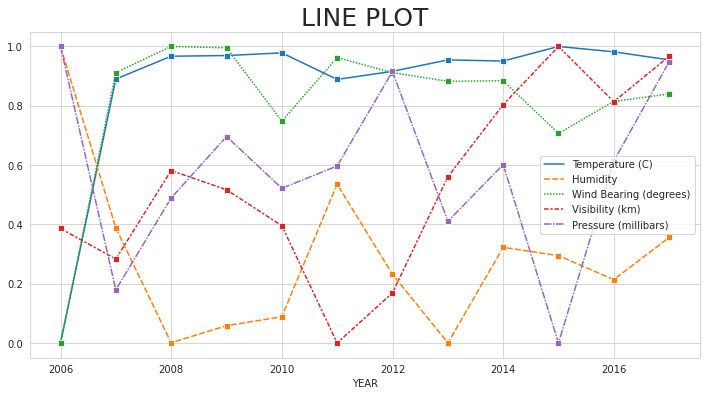

In [60]:
#line graph representation of all the data
plt.figure(figsize=(12,6))
plt.xlabel('YEAR')
plt.title('LINE PLOT', fontsize=25)
sns.lineplot(data=norm_data, marker='s')
plt.show()

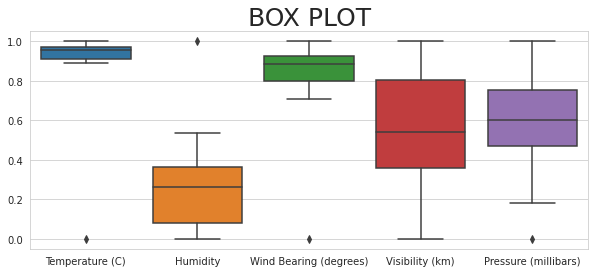

In [61]:
#boxplot
plt.figure(figsize=(10,4))
plt.title('BOX PLOT', fontsize=25)
sns.boxplot(data=norm_data)
plt.show()

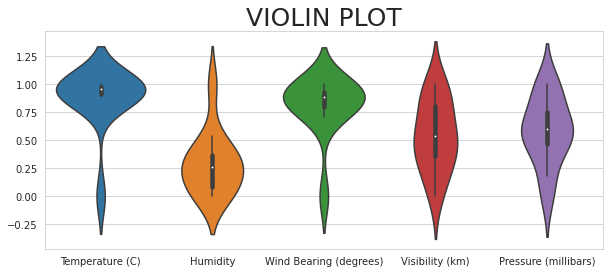

In [62]:
#violin plot
plt.figure(figsize=(10,4))
plt.title('VIOLIN PLOT', fontsize=25)
sns.violinplot(data=norm_data)
plt.show()

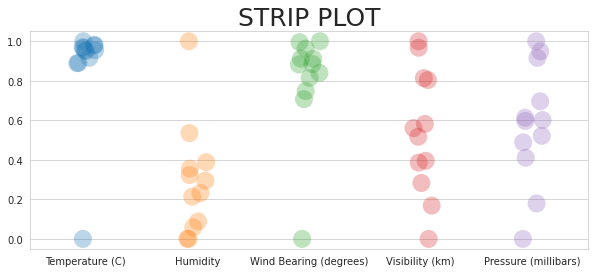

In [63]:
#strip plot
plt.figure(figsize=(10,4))
plt.title('STRIP PLOT', fontsize=25)
sns.stripplot(data=norm_data, jitter=True, s=18, alpha=0.3)
plt.show()

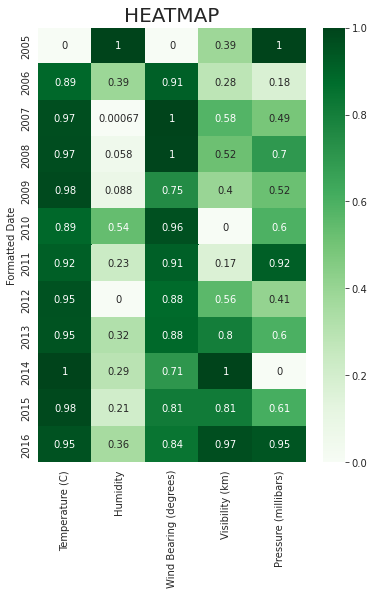

In [65]:
#heatmap
plt.figure(figsize=(6,8))
plt.title('HEATMAP', fontsize=20)
sns.heatmap(norm_data, annot=True, cmap='Greens', yticklabels=norm_data.index.year)
plt.show()

APPARENT TEMPERATURE VS HUMIDITY

In [66]:
weather_data.head(4)

Summary  ...                      Daily Summary
Formatted Date                            ...                                   
2006-03-31 22:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00  Mostly Cloudy  ...  Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00  Partly Cloudy  ...  Partly cloudy throughout the day.

[4 rows x 10 columns]

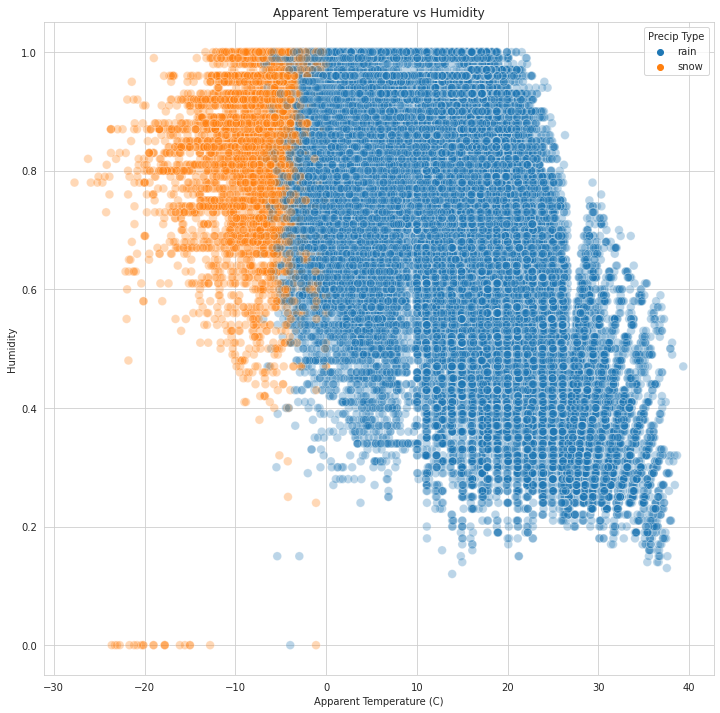

In [68]:
#plot for apparent temperature and humidity by precip type
plt.figure(figsize=(12,12))
plt.title('Apparent Temperature vs Humidity')
sns.scatterplot(x=weather_data.iloc[:,3],
                y=weather_data.iloc[:,4],
                hue=weather_data.iloc[:,1],
                s=75,
                alpha=0.3)
plt.show()

In [70]:
# Resampling the data month-wise by mean
monthly_data = weather_data.iloc[:,3:5].resample('M').mean()
monthly_data.head(5)

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                 -4.050000  0.890000
2006-01-31 00:00:00+00:00                 -4.173708  0.834610
2006-02-28 00:00:00+00:00                 -2.990716  0.843467
2006-03-31 00:00:00+00:00                  1.969780  0.778737
2006-04-30 00:00:00+00:00                 12.098827  0.728625

In [71]:
monthly_data.describe()

Apparent Temperature (C)    Humidity
count                133.000000  133.000000
mean                  10.689657    0.736422
std                    9.178501    0.101570
min                   -8.817241    0.491250
25%                    1.969780    0.669328
50%                   11.782770    0.735309
75%                   19.526790    0.823965
max                   24.525343    0.925390

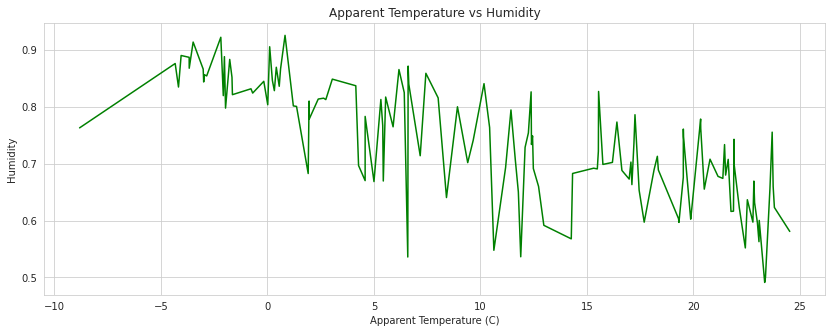

In [72]:
# Graphical representation of Apparent Temperature Vs Humidity
plt.figure(figsize=(14,5))
plt.title('Apparent Temperature vs Humidity')
sns.lineplot(x=monthly_data.iloc[:,0],
             y=monthly_data.iloc[:,1],
             color='green')
plt.show()

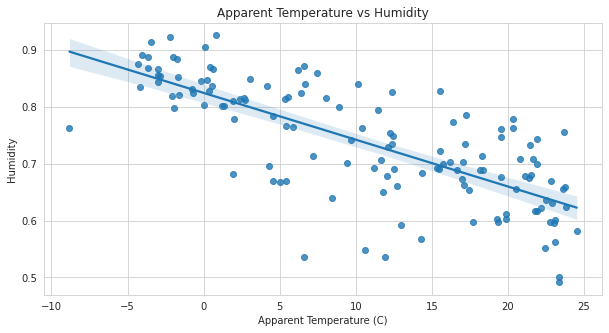

In [73]:
# Regression plot for Apparent Temperature & Humidity
plt.figure(figsize=(10,5))
plt.title('Apparent Temperature vs Humidity')
sns.regplot(x=monthly_data.iloc[:,0],
            y=monthly_data.iloc[:,1])
plt.show()

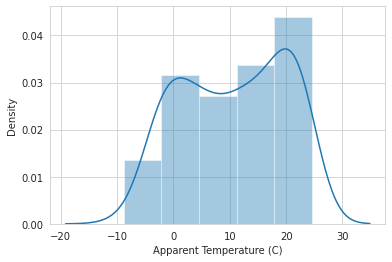

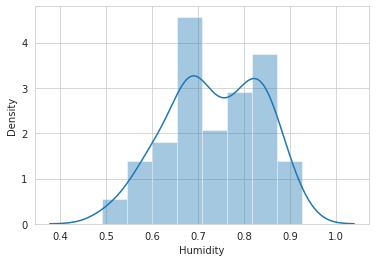

In [74]:
# Distplot for Apparent Temperature & Humidity
sns.distplot(monthly_data['Apparent Temperature (C)'])
plt.show()
sns.distplot(monthly_data['Humidity'])
plt.show()

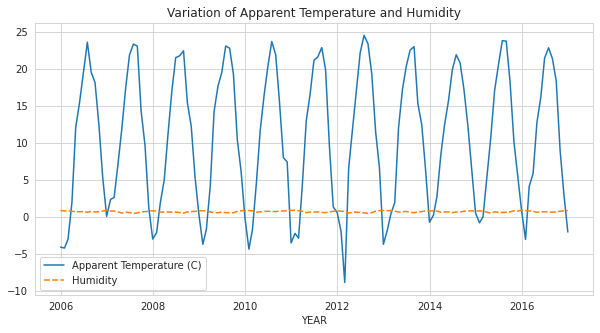

In [75]:
plt.figure(figsize=(10,5))
plt.xlabel('YEAR')
plt.title('Variation of Apparent Temperature and Humidity')
sns.lineplot(data=monthly_data)
plt.show()

                          Apparent Temperature (C)  Humidity
Apparent Temperature (C)                   1.00000  -0.74289
Humidity                                  -0.74289   1.00000


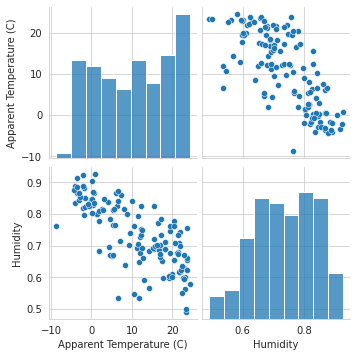

In [76]:
# Pair plot for correlation of Apparent temperature & Humidity
print(monthly_data.corr())
sns.pairplot(monthly_data, kind='scatter')
plt.show()

In [77]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = monthly_data.iloc[:,0]
HUM_DATA = monthly_data.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'

def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,
                 label=label,
                 color=color,
                 marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

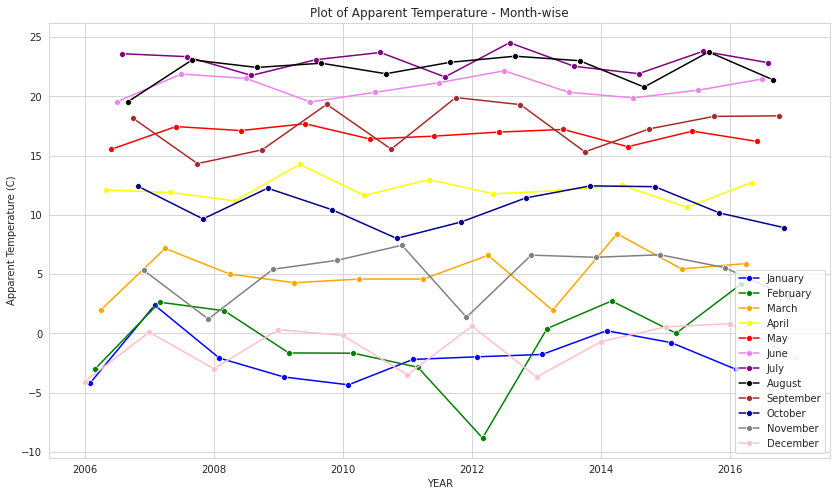

In [78]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Plot of Apparent Temperature - Month-wise' 
sns_plot(title, TEMP_DATA)

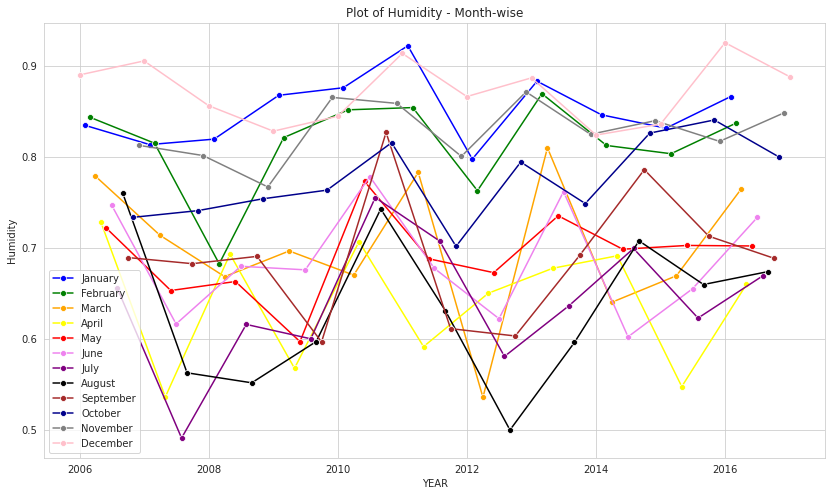

In [79]:
# Month-wise Plot for Humidity of 10 years 
title = 'Plot of Humidity - Month-wise' 
sns_plot(title, HUM_DATA)

In [80]:
# Function for plotting Apparent Temperature & Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = monthly_data[monthly_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    print(data.describe())
    sns.pairplot(data, kind='reg')
    plt.show()
    print('-'*80)

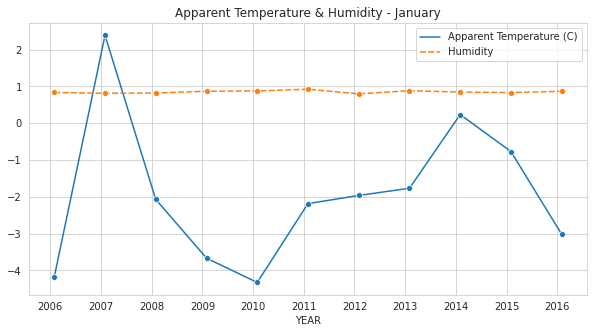

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  -1.938761   0.850698
std                    1.994305   0.036231
min                   -4.329062   0.797581
25%                   -3.342257   0.825497
50%                   -2.069907   0.846169
75%                   -1.269351   0.871767
max                    2.387015   0.922030


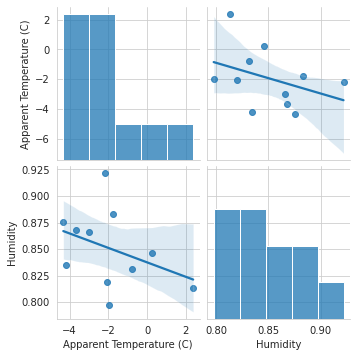

--------------------------------------------------------------------------------


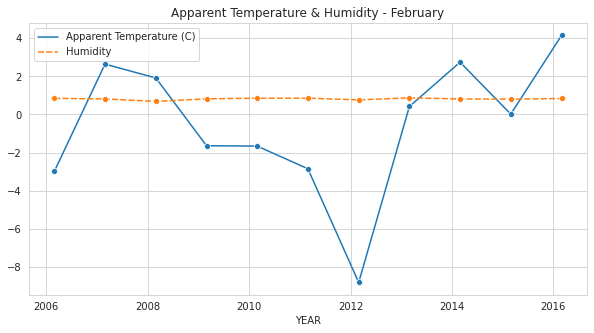

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  -0.552392   0.813920
std                    3.639693   0.052467
min                   -8.817241   0.682615
25%                   -2.255758   0.807991
50%                    0.017006   0.821161
75%                    2.277722   0.847574
max                    4.150782   0.869345


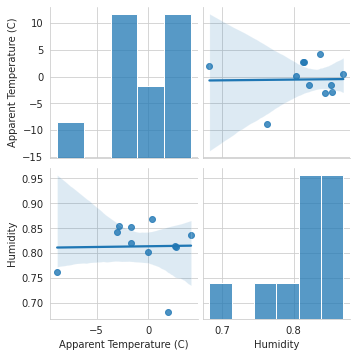

--------------------------------------------------------------------------------


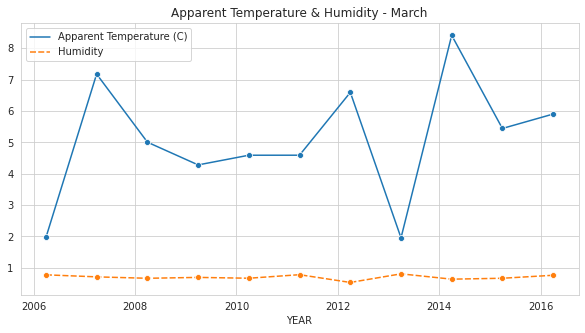

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                   5.082583   0.702849
std                    1.977499   0.079217
min                    1.957445   0.535941
25%                    4.434812   0.668972
50%                    5.004353   0.696680
75%                    6.246453   0.771707
max                    8.408303   0.809946


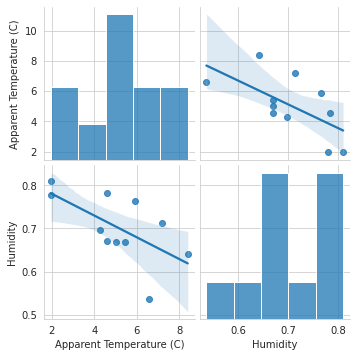

--------------------------------------------------------------------------------


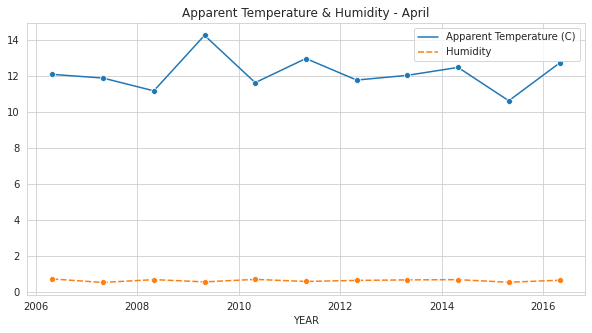

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  12.158287   0.641051
std                    0.965900   0.068193
min                   10.632801   0.536361
25%                   11.711088   0.579736
50%                   12.045563   0.659972
75%                   12.608804   0.692299
max                   14.267076   0.728625


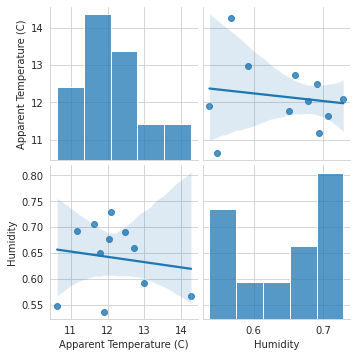

--------------------------------------------------------------------------------


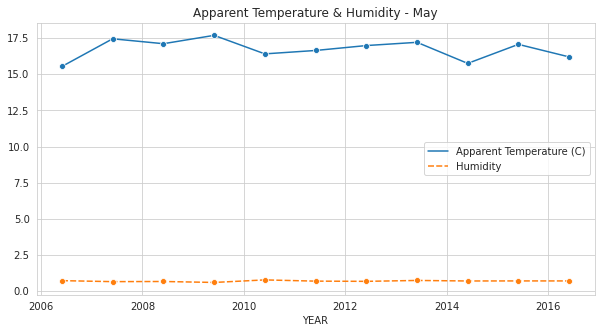

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  16.733265   0.691650
std                    0.690476   0.046167
min                   15.539479   0.597151
25%                   16.304547   0.667997
50%                   16.985596   0.698602
75%                   17.161279   0.712272
max                   17.691256   0.773091


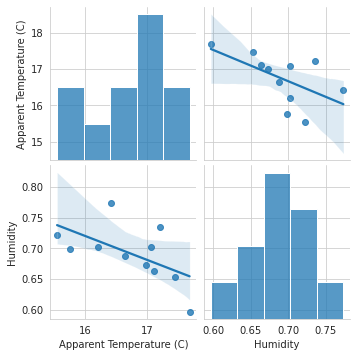

--------------------------------------------------------------------------------


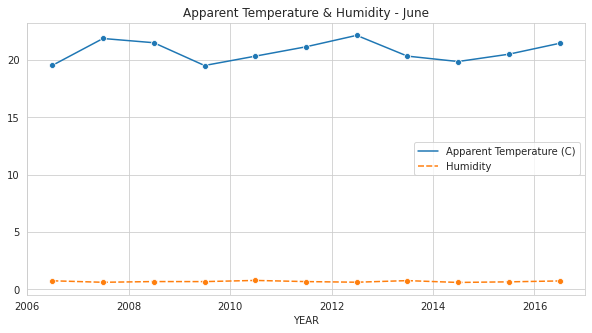

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  20.755415   0.686418
std                    0.929861   0.061076
min                   19.526790   0.602403
25%                   20.107438   0.638757
50%                   20.511782   0.677611
75%                   21.488569   0.740292
max                   22.157130   0.778347


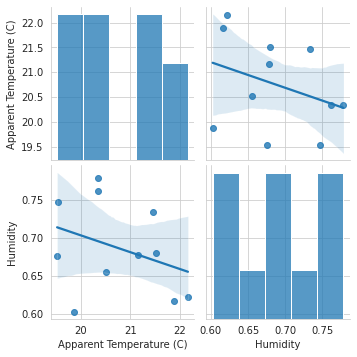

--------------------------------------------------------------------------------


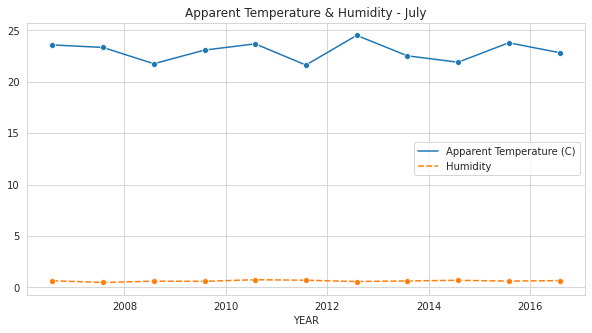

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  22.977215   0.639615
std                    0.935654   0.071127
min                   21.634984   0.491250
25%                   22.222634   0.608118
50%                   23.091614   0.636586
75%                   23.647398   0.684360
max                   24.525343   0.755323


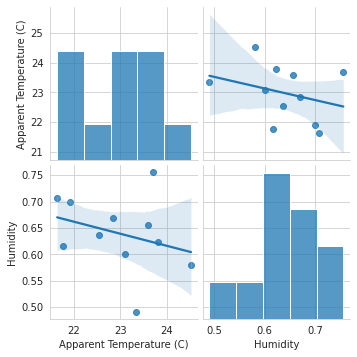

--------------------------------------------------------------------------------


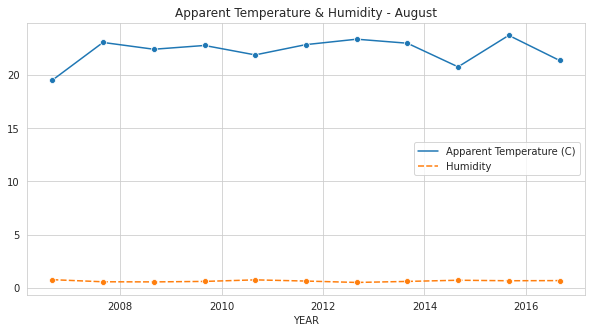

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  22.265649   0.634984
std                    1.262309   0.082539
min                   19.528241   0.500081
25%                   21.644904   0.579570
50%                   22.794205   0.631263
75%                   23.042469   0.690927
max                   23.745766   0.760753


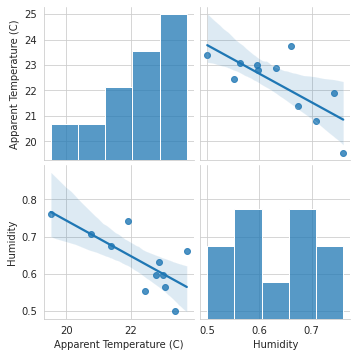

--------------------------------------------------------------------------------


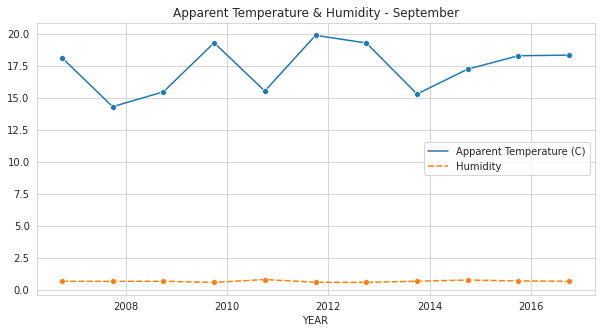

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  17.389856   0.689163
std                    1.916780   0.071334
min                   14.328457   0.596764
25%                   15.519510   0.647042
50%                   18.155571   0.689444
75%                   18.829390   0.702438
max                   19.899900   0.826806


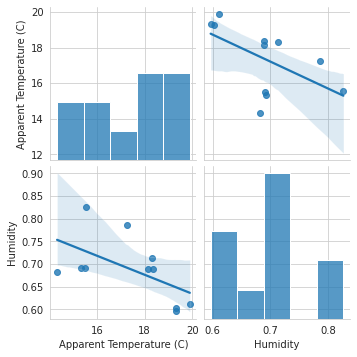

--------------------------------------------------------------------------------


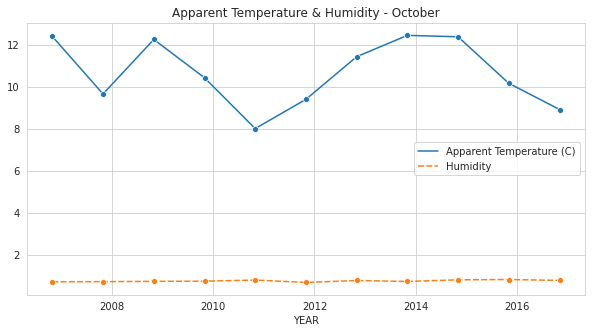

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                  10.684673   0.774443
std                    1.586861   0.043637
min                    8.017145   0.701747
25%                    9.533890   0.744852
50%                   10.433535   0.763468
75%                   12.317596   0.807722
max                   12.449134   0.840524


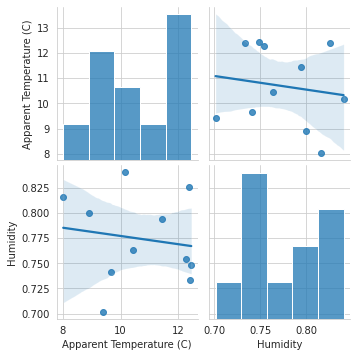

--------------------------------------------------------------------------------


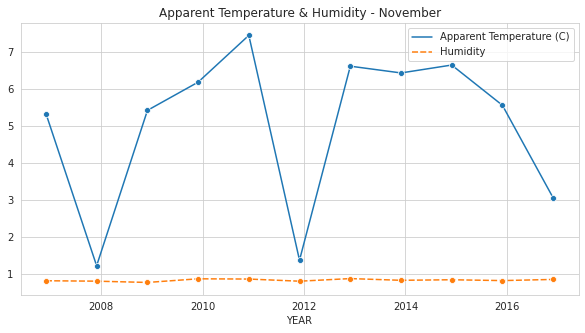

       Apparent Temperature (C)   Humidity
count                 11.000000  11.000000
mean                   5.020255   0.827917
std                    2.157034   0.032129
min                    1.218225   0.766972
25%                    4.188468   0.807083
50%                    5.553040   0.824792
75%                    6.516898   0.853597
max                    7.440934   0.871389


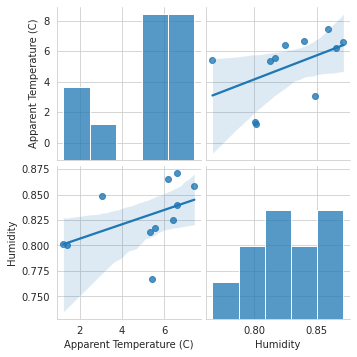

--------------------------------------------------------------------------------


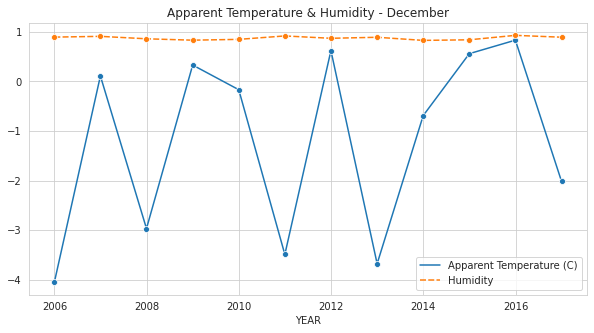

       Apparent Temperature (C)   Humidity
count                 12.000000  12.000000
mean                  -1.217679   0.872032
std                    1.885679   0.034442
min                   -4.050000   0.823965
25%                   -3.095159   0.842460
50%                   -0.429570   0.876512
75%                    0.384689   0.893844
max                    0.828644   0.925390


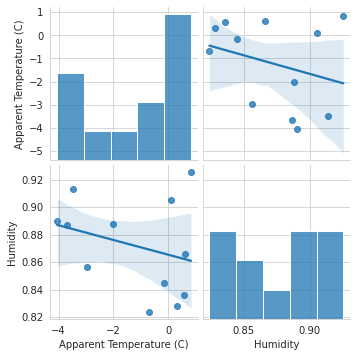

--------------------------------------------------------------------------------


In [81]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

ANALYSIS ON NORMALIZED DATA

In [82]:
#normalizing data
data = monthly_data
normed_data = (data - data.min()) / (data.max() - data.min())
normed_data.head()

Apparent Temperature (C)  Humidity
Formatted Date                                               
2005-12-31 00:00:00+00:00                  0.142978  0.918483
2006-01-31 00:00:00+00:00                  0.139267  0.790898
2006-02-28 00:00:00+00:00                  0.174747  0.811299
2006-03-31 00:00:00+00:00                  0.323521  0.662198
2006-04-30 00:00:00+00:00                  0.627308  0.546771

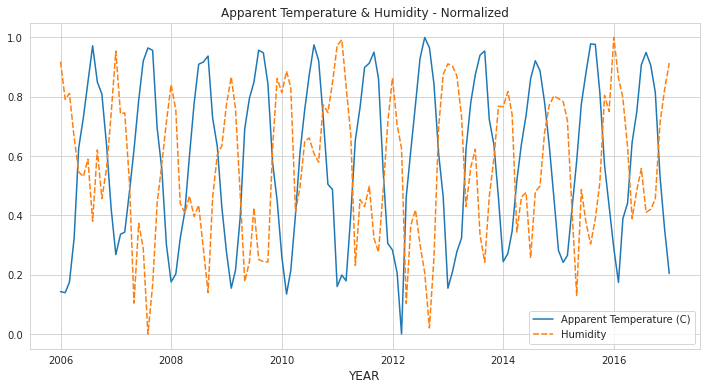

In [83]:
# Line graph representation of normalized data
plt.figure(figsize=(12,6))
plt.title('Apparent Temperature & Humidity - Normalized')
plt.xlabel('YEAR', fontsize=12)
sns.lineplot(data=normed_data)
plt.show()

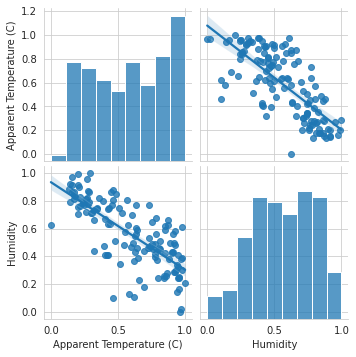

In [84]:
# Correlation of variables
sns.pairplot(normed_data, kind='reg')
plt.show()

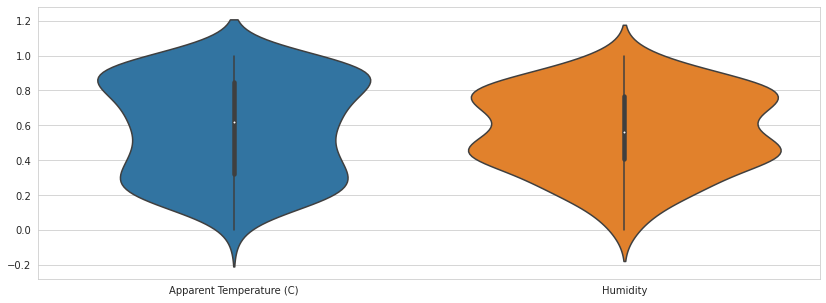

In [85]:
# Violin Plot for above graph
plt.figure(figsize=(14,5))
sns.violinplot(data=normed_data)
plt.show()

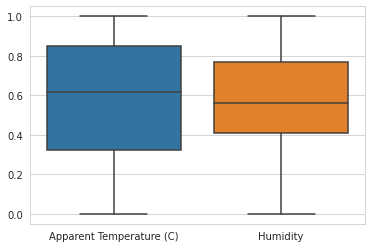

In [86]:
sns.boxplot(data=normed_data)
plt.show()

In [87]:
def sns_month_plot(month):
    plt.figure(figsize=(10,5))
    label = label_color(month)[0]
    plt.title('Apparent Temperature & Humidity - {}'.format(label))
    plt.xlabel('YEAR')
    data = normed_data[normed_data.index.month == month]
    sns.lineplot(data=data, marker='o')
    plt.show()
    sns.pairplot(data, kind='reg')
    plt.show()
    plt.title('Boxplot - {}'.format(label))
    sns.boxplot(data=data)
    plt.show()
    print('-'*80)

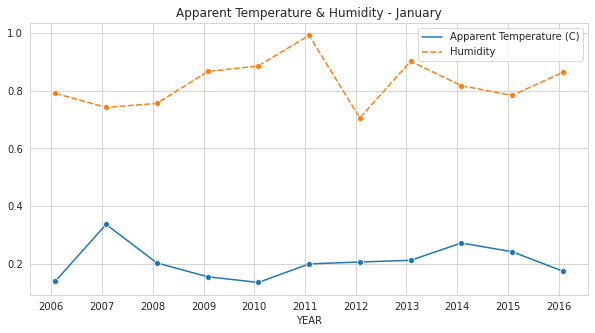

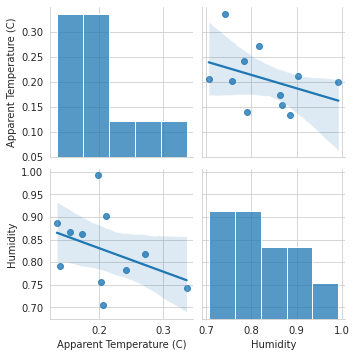

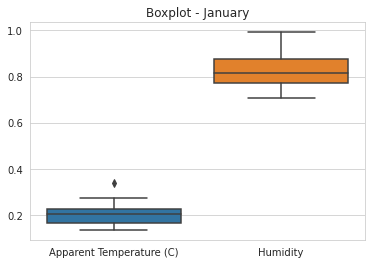

--------------------------------------------------------------------------------


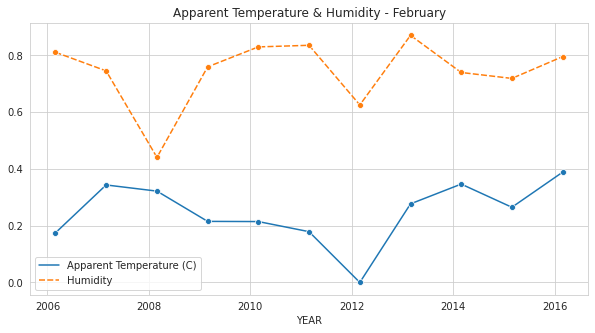

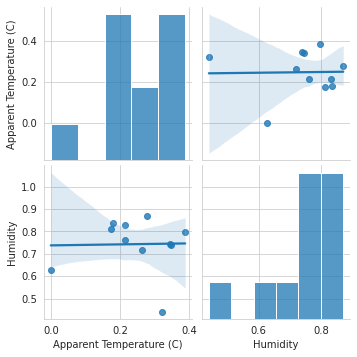

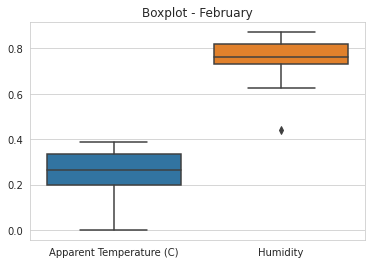

--------------------------------------------------------------------------------


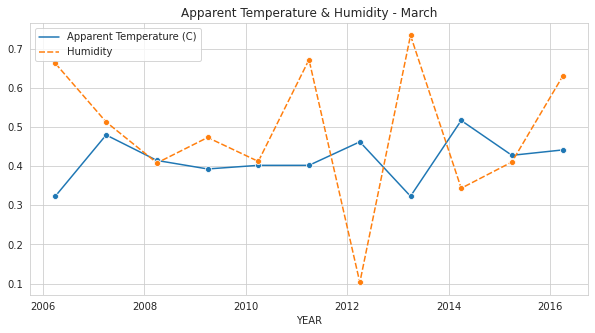

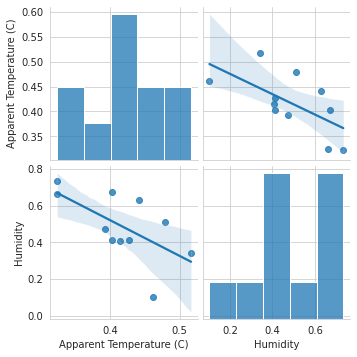

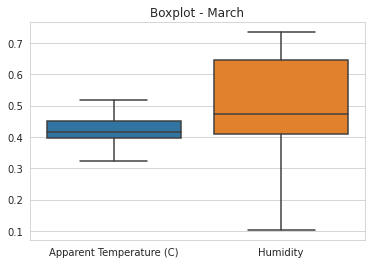

--------------------------------------------------------------------------------


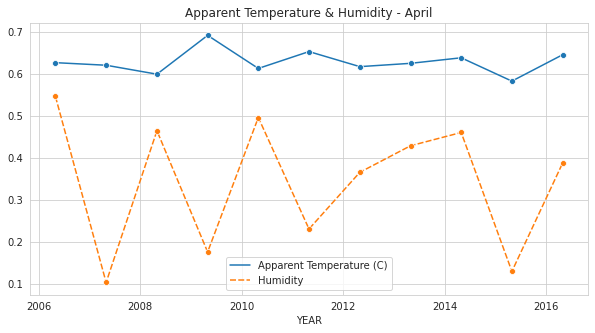

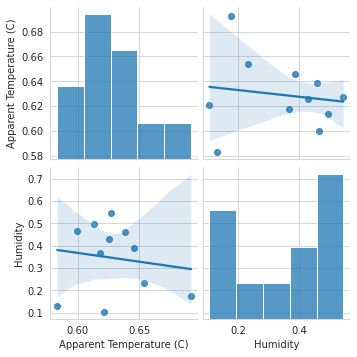

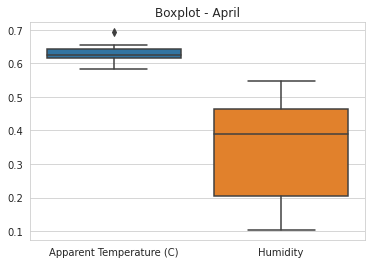

--------------------------------------------------------------------------------


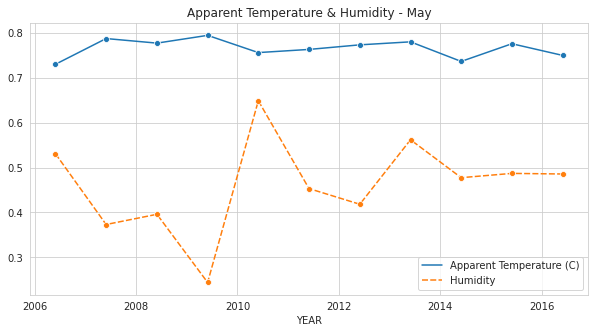

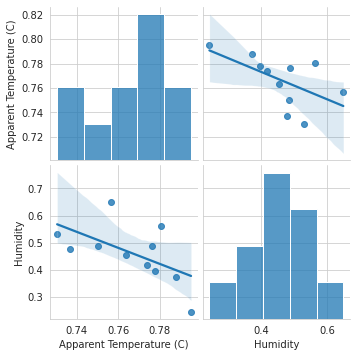

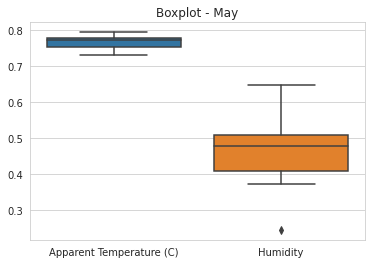

--------------------------------------------------------------------------------


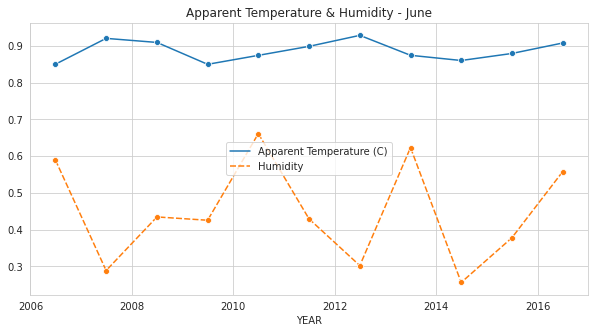

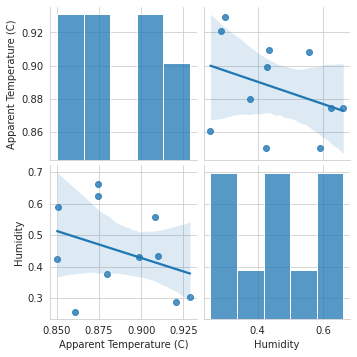

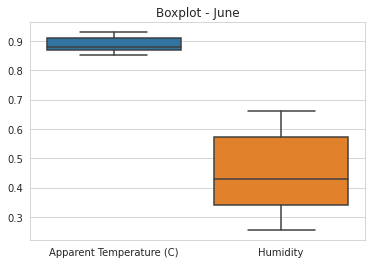

--------------------------------------------------------------------------------


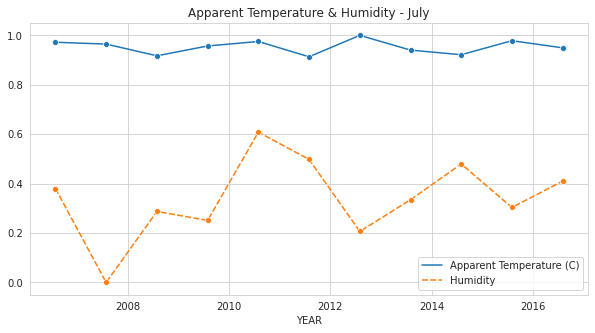

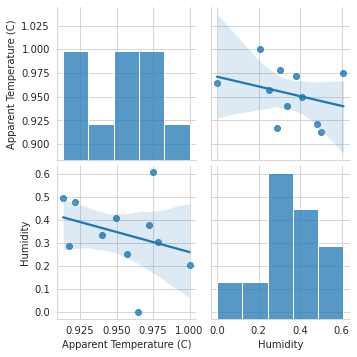

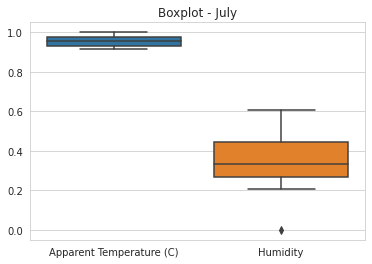

--------------------------------------------------------------------------------


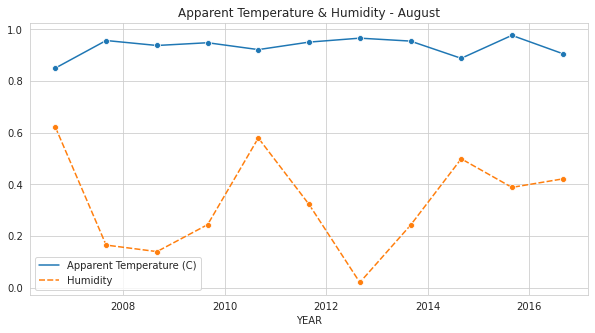

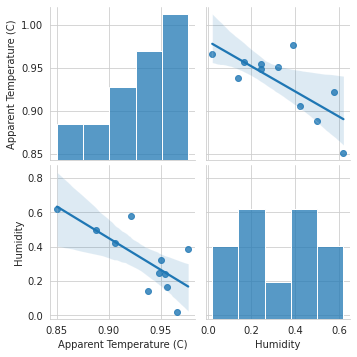

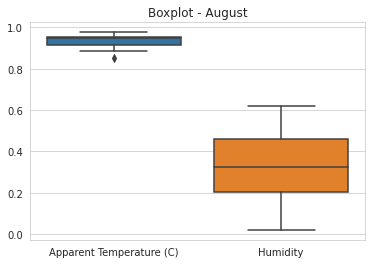

--------------------------------------------------------------------------------


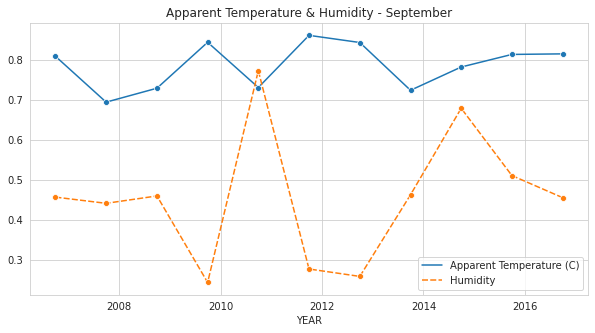

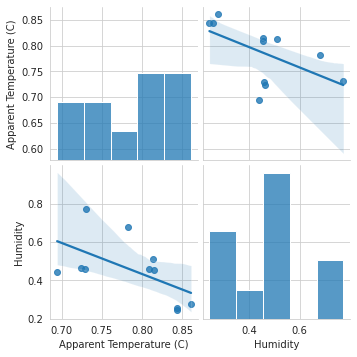

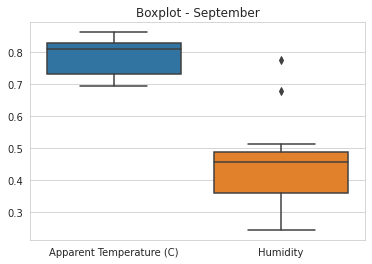

--------------------------------------------------------------------------------


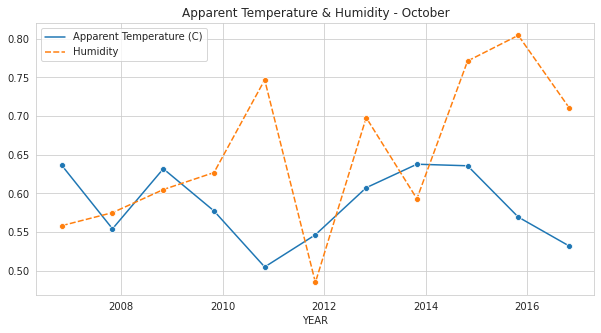

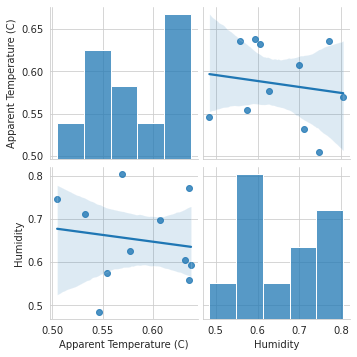

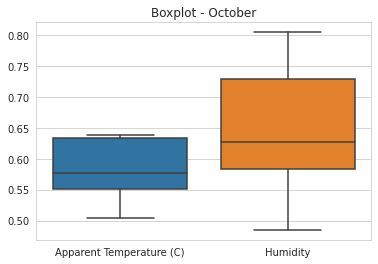

--------------------------------------------------------------------------------


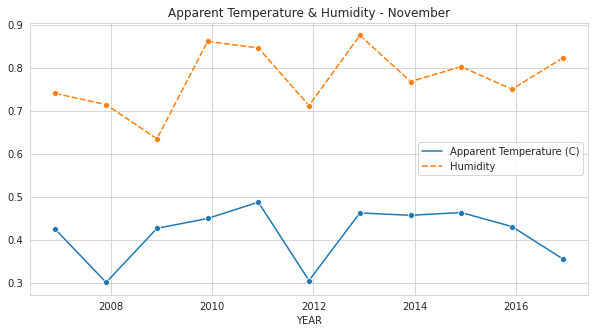

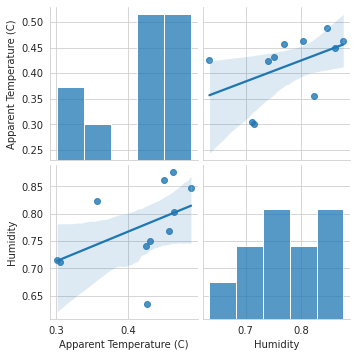

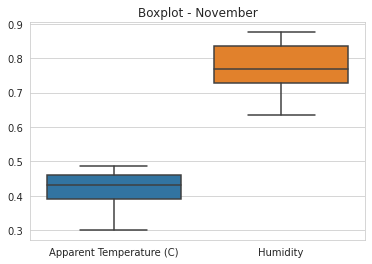

--------------------------------------------------------------------------------


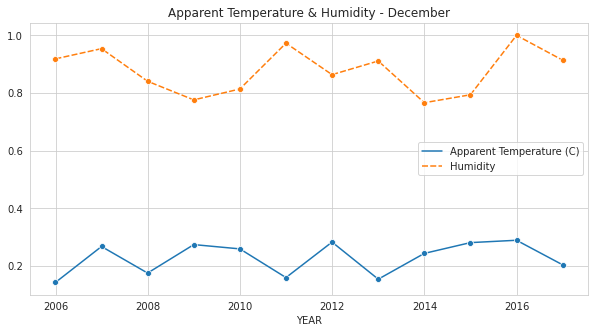

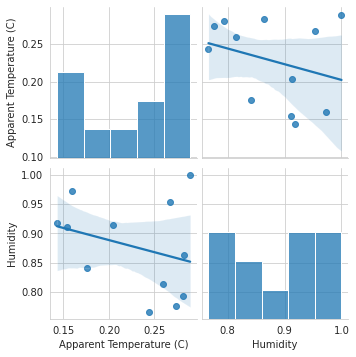

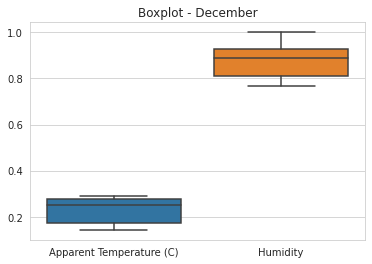

--------------------------------------------------------------------------------


In [88]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)